# Data 620 High Frequency Words

**Tyler Baker and Rathish Parayil Sasidharan**
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, 
   defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

**Please find the link to the presentation**

https://www.youtube.com/watch?v=6VJypl8srpg

**Data Set **

"A TALE OF TWO CITIES" by Charles Dickens

Project Gutenberg https://www.gutenberg.org/files/98/98-0.txt

**Data Preparation**


In [77]:
import urllib, re, nltk, string
import matplotlib.pyplot as plt
% matplotlib inline


response =''
for line in urllib.request.urlopen('https://www.gutenberg.org/files/98/98-0.txt'):
    response =response +line.decode('utf-8')
    

raw = response[813:774401]

**Text Preparation**

Now we read the data from the website, we need to convert them into words for further processing.
We will be using regular expression for that


In [78]:
pattern = r'\w{2,}' #we want to remove unwanted characters like *, # etc
tokens = nltk.regexp_tokenize(raw, pattern)
text = nltk.Text(tokens)

**Lemmatization**

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.  Lemmatization is similar to stemming but it brings context to the words. 
So it links words with similar meanings to one word. 

In [79]:
text = [word.lower() for word in text]

wnl = nltk.WordNetLemmatizer()
text = [wnl.lemmatize(t) for t in text]
text[:10]

['start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'tale',
 'of',
 'two',
 'city']

**2. How many total unique words are in the corpus?**

In [80]:
#set will remove the duplicates
uniqueWords = len(set(text))
print("Unique Words: ", uniqueWords)

Unique Words:  8774


**3. Taking the most common words, how many unique words represent half of the total words in the corpus? **

In [81]:
totalWordCnt = float(len(text))
print("Lexical Diversity: ", len(set(text)) / totalWordCnt)
print("Number of Words in Corpus: ", totalWordCnt)

Lexical Diversity:  0.06620637615544236
Number of Words in Corpus:  132525.0


In [82]:
wordFreq = nltk.FreqDist(text)
cumulative = 0
index1 =0
for word, rank in wordFreq.most_common():
    cumulative += rank 
    index1 =index1 +1
    print ("%s  %6.2f%%  " % (word,(cumulative/totalWordCnt)*100))
    if cumulative > totalWordCnt/2:
        break

print("Number of words which makes half is = %d" %(index1) )       

the    6.08%  
and    9.85%  
of   12.88%  
to   15.57%  
in   17.54%  
it   19.26%  
his   20.78%  
that   22.24%  
he   23.64%  
wa   24.97%  
you   26.04%  
with   27.03%  
had   28.01%  
a   28.89%  
her   29.68%  
at   30.46%  
him   31.19%  
for   31.92%  
on   32.62%  
not   33.26%  
is   33.88%  
be   34.46%  
have   35.02%  
were   35.52%  
said   36.02%  
but   36.52%  
my   37.01%  
mr   37.49%  
so   37.94%  
there   38.38%  
by   38.82%  
they   39.24%  
all   39.66%  
this   40.08%  
no   40.49%  
me   40.89%  
from   41.27%  
if   41.62%  
she   41.97%  
out   42.31%  
one   42.64%  
been   42.97%  
when   43.30%  
which   43.62%  
them   43.92%  
what   44.21%  
who   44.50%  
lorry   44.78%  
hand   45.05%  
or   45.33%  
an   45.59%  
would   45.85%  
your   46.10%  
into   46.34%  
time   46.58%  
up   46.82%  
their   47.06%  
are   47.29%  
defarge   47.52%  
do   47.75%  
man   47.97%  
will   48.19%  
upon   48.41%  
could   48.62%  
little   48.83%  
more   49.0

We could see that 72 unique words makes half of the total words in the corpus

**4. Identify the 200 highest frequency words in this corpus"**

We could use the mos_common(200) from FreqDist to identify the top 200 common words

In [83]:
wordFreq = nltk.FreqDist(text)
top200 = wordFreq.most_common(200)
top200

[('the', 8054),
 ('and', 4999),
 ('of', 4016),
 ('to', 3571),
 ('in', 2602),
 ('it', 2287),
 ('his', 2008),
 ('that', 1935),
 ('he', 1855),
 ('wa', 1770),
 ('you', 1411),
 ('with', 1311),
 ('had', 1305),
 ('a', 1163),
 ('her', 1043),
 ('at', 1034),
 ('him', 976),
 ('for', 961),
 ('on', 927),
 ('not', 855),
 ('is', 821),
 ('be', 766),
 ('have', 743),
 ('were', 661),
 ('said', 661),
 ('but', 659),
 ('my', 655),
 ('mr', 640),
 ('so', 593),
 ('there', 585),
 ('by', 573),
 ('they', 564),
 ('all', 555),
 ('this', 554),
 ('no', 543),
 ('me', 527),
 ('from', 514),
 ('if', 461),
 ('she', 460),
 ('out', 449),
 ('one', 442),
 ('been', 440),
 ('when', 439),
 ('which', 421),
 ('them', 399),
 ('what', 383),
 ('who', 380),
 ('lorry', 369),
 ('hand', 364),
 ('or', 364),
 ('an', 347),
 ('would', 343),
 ('your', 331),
 ('into', 319),
 ('time', 318),
 ('up', 318),
 ('their', 317),
 ('are', 314),
 ('defarge', 302),
 ('do', 300),
 ('man', 300),
 ('will', 291),
 ('upon', 289),
 ('could', 282),
 ('little', 2

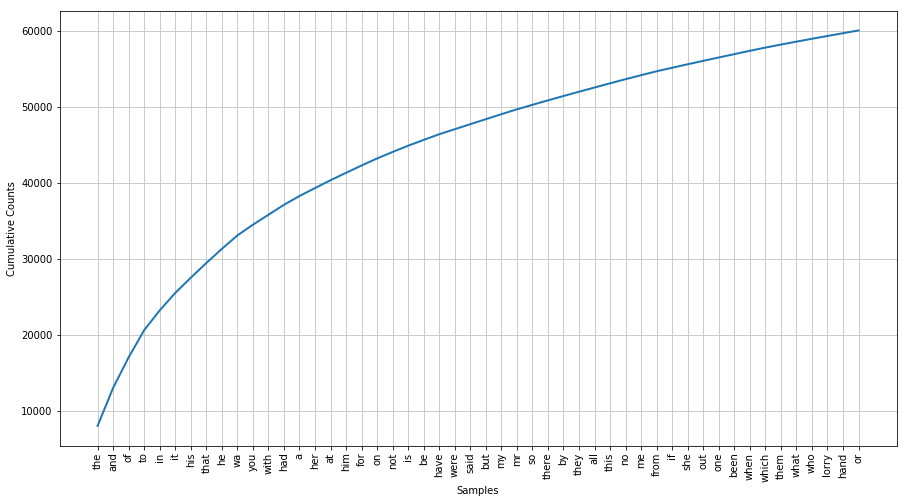

In [84]:
plt.figure(figsize=(15,8))
wordFreq.plot(50, cumulative=True)

**5. Create a graph that shows the relative frequency of these 200 words.**

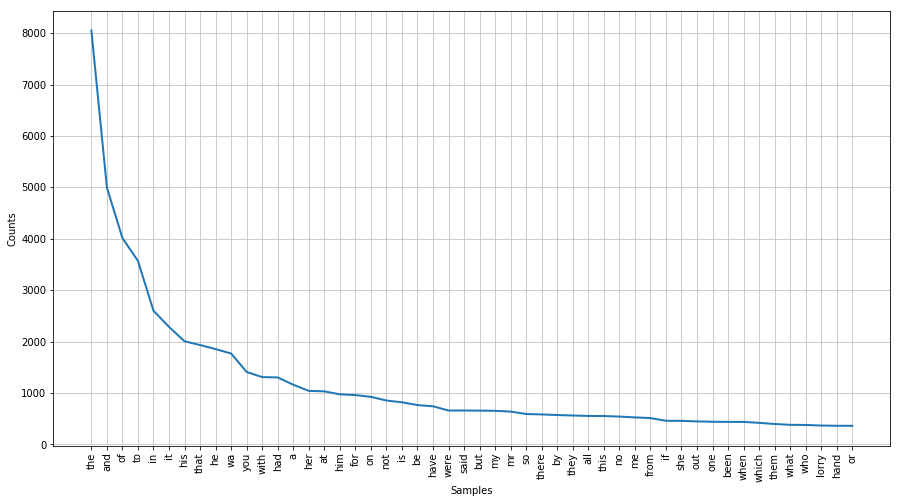

In [85]:
plt.figure(figsize=(15,8))
wordFreq.plot(50)

**Does the observed relative frequency of these words follow Zipf’s law? Explain**

Zipf’s Law states that the frequency of a word type is inversely proportional to its rank 
Suppose that all the words of a text are ranked according to their frequency, with the most frequent
word first. For example, the 50th most common word type should occur three times as frequently as the 150th most
common word type

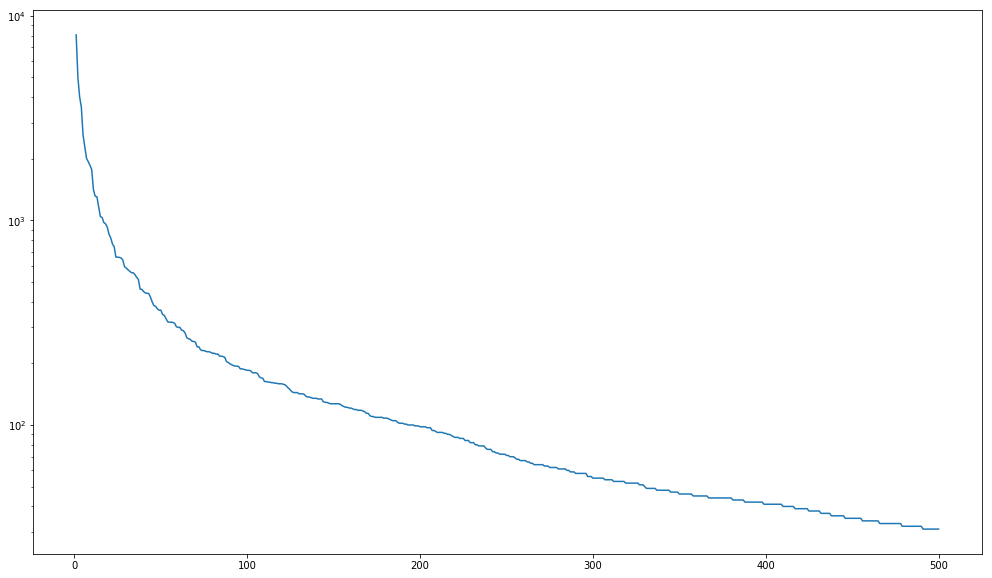

In [76]:
zipf_data = top_words = wordFreq.most_common(500)
x = [w+1 for w in range(len(zipf_data))]
y = [freq for (word,freq) in zipf_data]


plt.figure(1, figsize=(17,10))
plt.semilogy(x, y)
plt.show()



We could see that there is drop in frequency as , but not exactly proportional to their ranking.

**In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?**

As per our analysis the words in this corpora doesnot differ with the words in other corpara. I think they all follow almost the same pattern